# Test de lecture et conversion des coordonnées de l'ISS

In [19]:
import pandas as pd
# data from ISS.OEM_J2K_EPH.txt
df = pd.read_csv("ISS.OEM_J2K_EPH.txt", skiprows=41,
                 sep=" ", names=['datetime', 'x', 'y', 'z', 'vx', 'vy', 'vz'],
                 parse_dates=[0], infer_datetime_format=True)
df.head()

,datetime,x,y,z,vx,vy,vz
0,2023-03-24 18:41:29.004,4482.285420,-1945.879050,-4735.454317,5.092194,4.987269,2.771175
1,2023-03-24 18:45:29.004,5527.582022,-693.041910,-3906.729727,3.565402,5.389738,4.093092
2,2023-03-24 18:49:29.004,6172.791603,609.934836,-2794.459786,1.778186,5.402386,5.119574
3,2023-03-24 18:53:29.004,6370.538918,1868.675170,-1479.074801,-0.140821,5.023142,5.775192
4,2023-03-24 18:57:29.004,6105.797591,2991.735742,-56.034355,-2.052317,4.278463,6.011005


## Test one row

In [7]:
from astropy.coordinates import SkyCoord, ICRS, ITRS
from astropy import units as u

# Sky coordinates from data
sc = SkyCoord(x=data.x, y=data.y, z=data.z, unit=u.km,
              frame=ICRS, representation_type='cartesian',obstime=data.datetime)
sc

<SkyCoord (ICRS): (x, y, z) in km
    (4482.28542, -1945.87905, -4735.454317)>

In [11]:
# Ground coordinates from sky coordinates
sr = sc.transform_to(ITRS).represent_as('spherical')
sr

<SphericalRepresentation (lon, lat, distance) in (rad, rad, km)
    (4.55880556, 0.02658149, 1.50487572e+08)>

In [21]:
# Longitude (rad)
sr.lon

<Longitude 4.55880556 rad>

In [22]:
# Longitude (deg)
sr.lon.degree

261.2003180310715

## Apply to more

In [23]:
def get_earth_coords_from_celestial_point(data):
    # coordonnées sidérales depuis les données
    sky = SkyCoord(x=data.x, y=data.y, z=data.z, unit=u.km, frame=ICRS,
                   representation_type='cartesian',obstime=data.datetime)
    # représentation terrestre sphérique
    earth = sky.transform_to(ITRS).represent_as('spherical')
    # coordonnées planétaires
    return earth.lon.degree, earth.lat.degree

In [24]:
df['longitude'], df['latitude'] = df.apply(get_earth_coords_from_celestial_point, axis=1,
                                           result_type='expand').transpose().values

<AxesSubplot:>

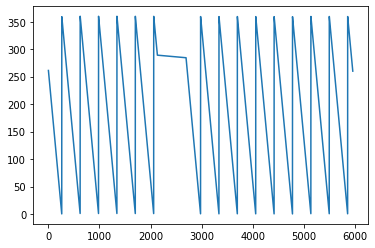

In [25]:
df['longitude'].plot()

<AxesSubplot:>

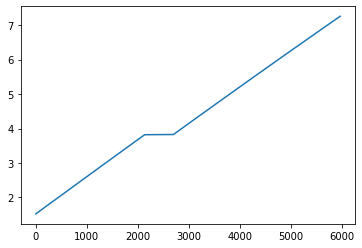

In [26]:
df['latitude'].plot()